# Analysis of faliure cases

 Overall, there are 1215 target-guess pairs in the test set and only 78 target-guess pairs are identical, but just these 78 identical target-guess pairs make up 73.4\% of the whole failure cases. It is very fascinating that more than 2/3 of the failure cases are happening when the model can find the type of object but is not able to find the right one out of the available options. 

In [49]:
import json
import matplotlib
import matplotlib.pyplot as plt
with open('test_unsuccessful_dialogue.json') as json_file:
    test_unsuccessful = json.load(json_file)
with open('val_unsuccessful_dialogue.json') as json_file:
    val_unsuccessful = json.load(json_file)
print(len(test_unsuccessful))
print(len(val_unsuccessful))

10877
11049


In [50]:
"One example of the vailure case from the validation set"
for s in val_unsuccessful:
    if s['guess']=="padding" :
        print(s)

{'dialogue_id': '7221', 'generated_dialogue': '<start> is it a carrot ? <no> is it a person ? <no> is it a playing ? <no> is it a personal ? <no> is it a laptop ? <no> is it a laptop ? <no> is it a table ? <no> is it a table ? <no> is it a do ? <no> is it a people ? <no>', 'image': 'COCO_train2014_000000038282.jpg', 'target': 'dog', 'guess': 'padding'}
{'dialogue_id': '1041502', 'generated_dialogue': '<start> is it does bed ? <no> is it does bed ? <no> is it a people ? <no> is it a table ? <no> is it a do ? <no> is it a people ? <no> is it a table ? <no> is it a table ? <no> is it a do ? <no> is it a people ? <no>', 'image': 'COCO_val2014_000000494550.jpg', 'target': 'banana', 'guess': 'padding'}
{'dialogue_id': '1871232', 'generated_dialogue': '<start> is it in the one ? <yes> is it on the picture pack ? <no> is it on the station pack ? <no> the cake pack ? <no> the fur there ? <yes> is it a bank stripes hanging the sleep ? <no> is it the there on the left you hanging the landscape ? 

In [51]:
"A strange distribution of Question cases."
question_types=set()
questions_8=0
for s in test_unsuccessful:
    dialogue=s['generated_dialogue']
    question_types.add(len(dialogue.split("?"))-1)
for s in val_unsuccessful:
    dialogue=s['generated_dialogue']
    question_types.add(len(dialogue.split("?"))-1)
    if  (len(dialogue.split("?"))-1)==8:
        questions_8+=1
    questions_10=len( val_unsuccessful)-questions_8
print("The number of questions being asked in both  failure datasets: ",question_types)
print("8 Question cases in validation set:",questions_8,";","10 Question cases in validation set:",questions_10)

The number of questions being asked in both  failure datasets:  {8, 10}
8 Question cases in validation set: 1 ; 10 Question cases in validation set: 11048


We see that the number of target objects and guessed objects are not equal in the test set.Moreover,the validation set has one  element more as a target object.

In [52]:
test_guess={}
test_target={}
for s in  test_unsuccessful:
    guess=s['guess']
    if guess not in test_guess:
        test_guess[guess]=0
    test_guess[guess]+=1
for s in  test_unsuccessful:
    target=s['target']
    if target not in test_target:
        test_target[target]=0
    test_target[target]+=1
difference_test=set(test_guess.keys())-set(test_target.keys())
print("How many elements were considered as a target object in test set: ",len(test_target))
print("How many elements were considered as a guessed object in test set: ",len(test_guess))
for s in difference_test:
    print("This object was never a target: ",s,", but it was  wronly guessed",test_guess[s],"times in the test set")
val_guess={}
val_target={}
for s in  val_unsuccessful:
    guess=s['guess']
    if guess not in val_guess:
        val_guess[guess]=0
    val_guess[guess]+=1
for s in  val_unsuccessful:
    target=s['target']
    if target not in val_target:
        val_target[target]=0
    val_target[target]+=1
difference_val=set(val_guess.keys())-set(val_target.keys())
print("How many elements were considered as a target object in validation set: ",len(val_target))
print("How many elements were considered as a guessed object in validation set: ",len(val_guess))
for s in difference_val:
    print("This object was never a target: ",s,", but it was  wronly guessed",val_guess[s],"times in the validation set")

How many elements were considered as a target object in test set:  79
How many elements were considered as a guessed object in test set:  81
This object was never a target:  padding , but it was  wronly guessed 5 times in the test set
This object was never a target:  hair drier , but it was  wronly guessed 3 times in the test set
How many elements were considered as a target object in validation set:  80
How many elements were considered as a guessed object in validation set:  81
This object was never a target:  padding , but it was  wronly guessed 4 times in the validation set


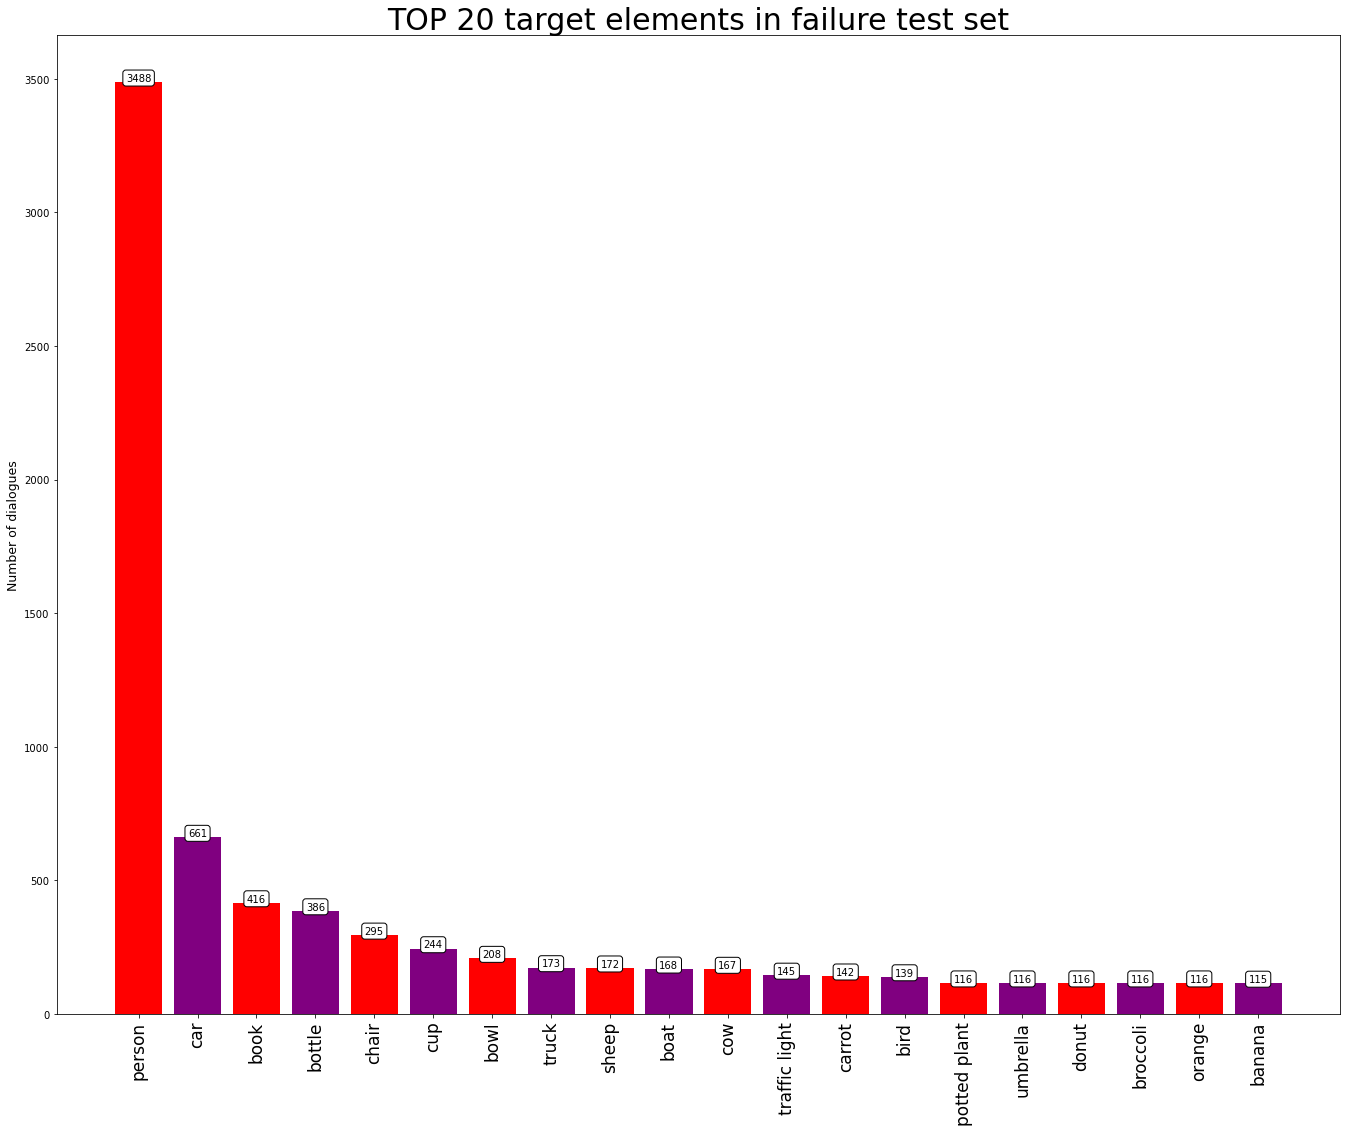

In [53]:
sorted_m={k: v for k, v in sorted(test_target.items(),reverse=True, key=lambda item: item[1])}

x= list(sorted_m.keys())[:20]
y = list(sorted_m.values())[:20]

fig, ax =  plt.subplots(figsize = (23, 18))
ax.bar(x, y,color=['r','purple'])
for bar in ax.patches:
    ax.annotate(text = bar.get_height(),
                  xy = (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', 
                  va='center',
                  size=10,
                  xytext=(0,4),bbox=dict(boxstyle="round", fc="w"),
               textcoords='offset points')
plt.xticks(fontsize=17)
plt.xticks(rotation=90)
plt.ylabel("Number of dialogues",fontsize=12.5)
plt.title("TOP 20 target elements in failure test set",fontsize=30)
plt.show() 

“Person” is the most problematic guessed object and after some analysis, the most common guessed-target failure pair is “person-person”, which is 3395 failure cases out of 11049 test cases. After some analysis, we noticed that the reason is that there were more people in the picture and the Guesser was just picking the wrong person. Therefore, there should be more description of the target person in the questions. This can be well seen in Figure Furthermore, Figure  shows that in a list of the most problematic target-guessed pairs only 1 out of 20 is non-identical and it is the case, where the car is being mislabeled as a truck.

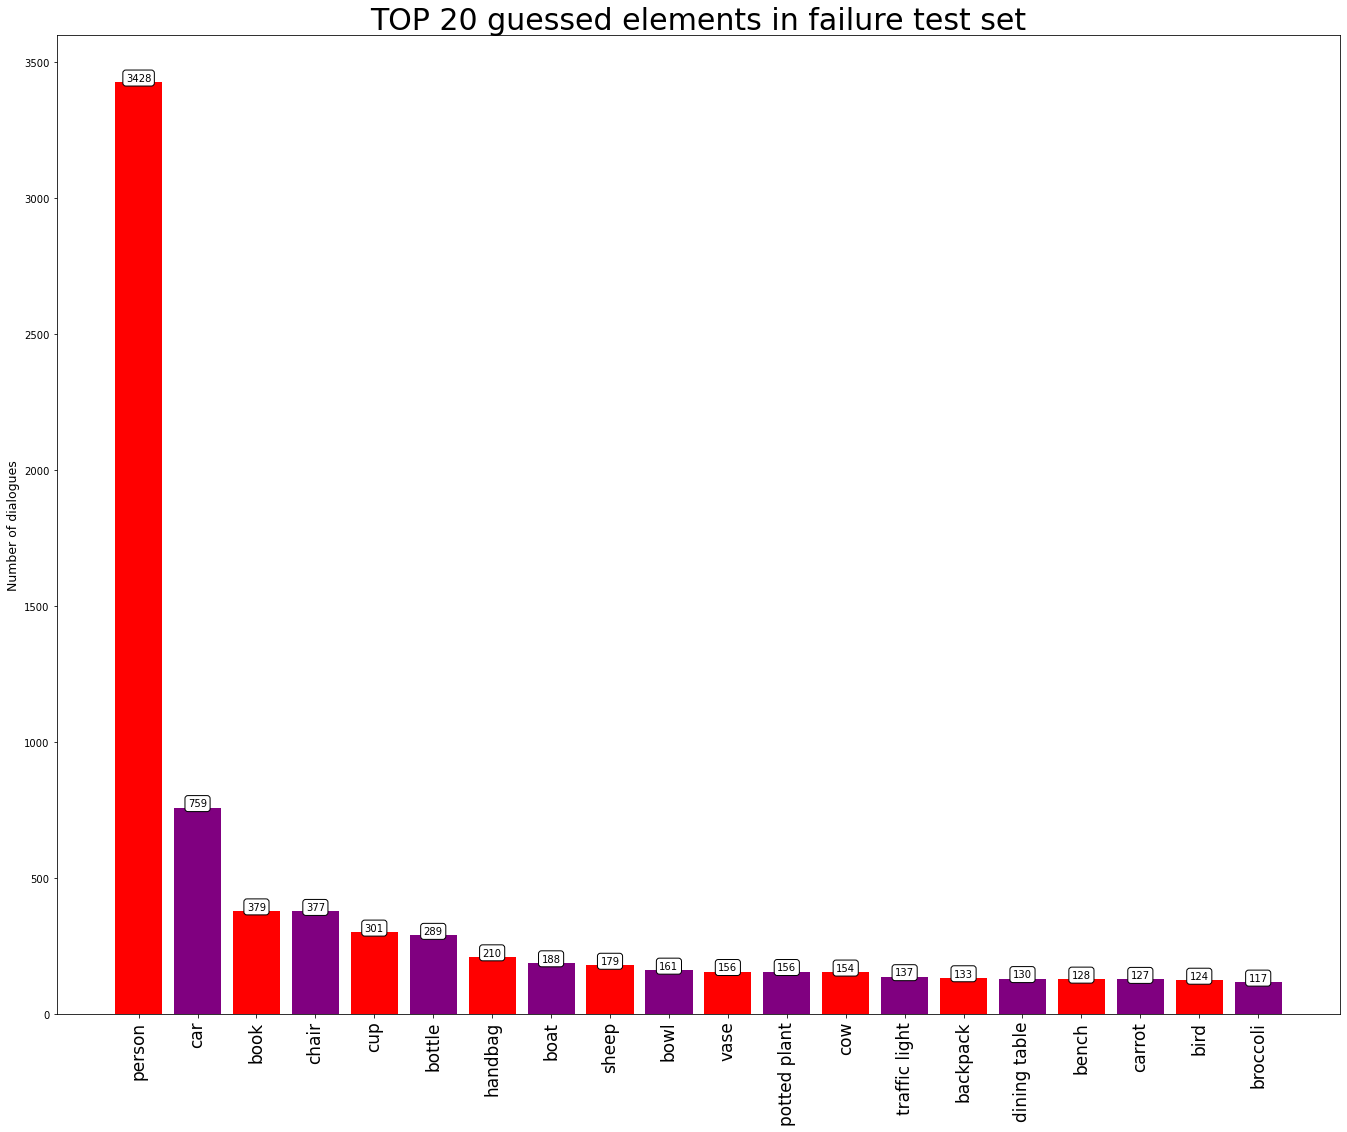

In [54]:
sorted_m={k: v for k, v in sorted(test_guess.items(),reverse=True, key=lambda item: item[1])}

x= list(sorted_m.keys())[:20]
y = list(sorted_m.values())[:20]

fig, ax =  plt.subplots(figsize = (23, 18))
ax.bar(x, y,color=['r','purple'])
for bar in ax.patches:
    ax.annotate(text = bar.get_height(),
                  xy = (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', 
                  va='center',
                  size=10,
                  xytext=(0,4),bbox=dict(boxstyle="round", fc="w"),
               textcoords='offset points')
plt.xticks(fontsize=17)
plt.xticks(rotation=90)
plt.ylabel("Number of dialogues",fontsize=12.5)
plt.title("TOP 20 guessed elements in failure test set",fontsize=30)
plt.show() 

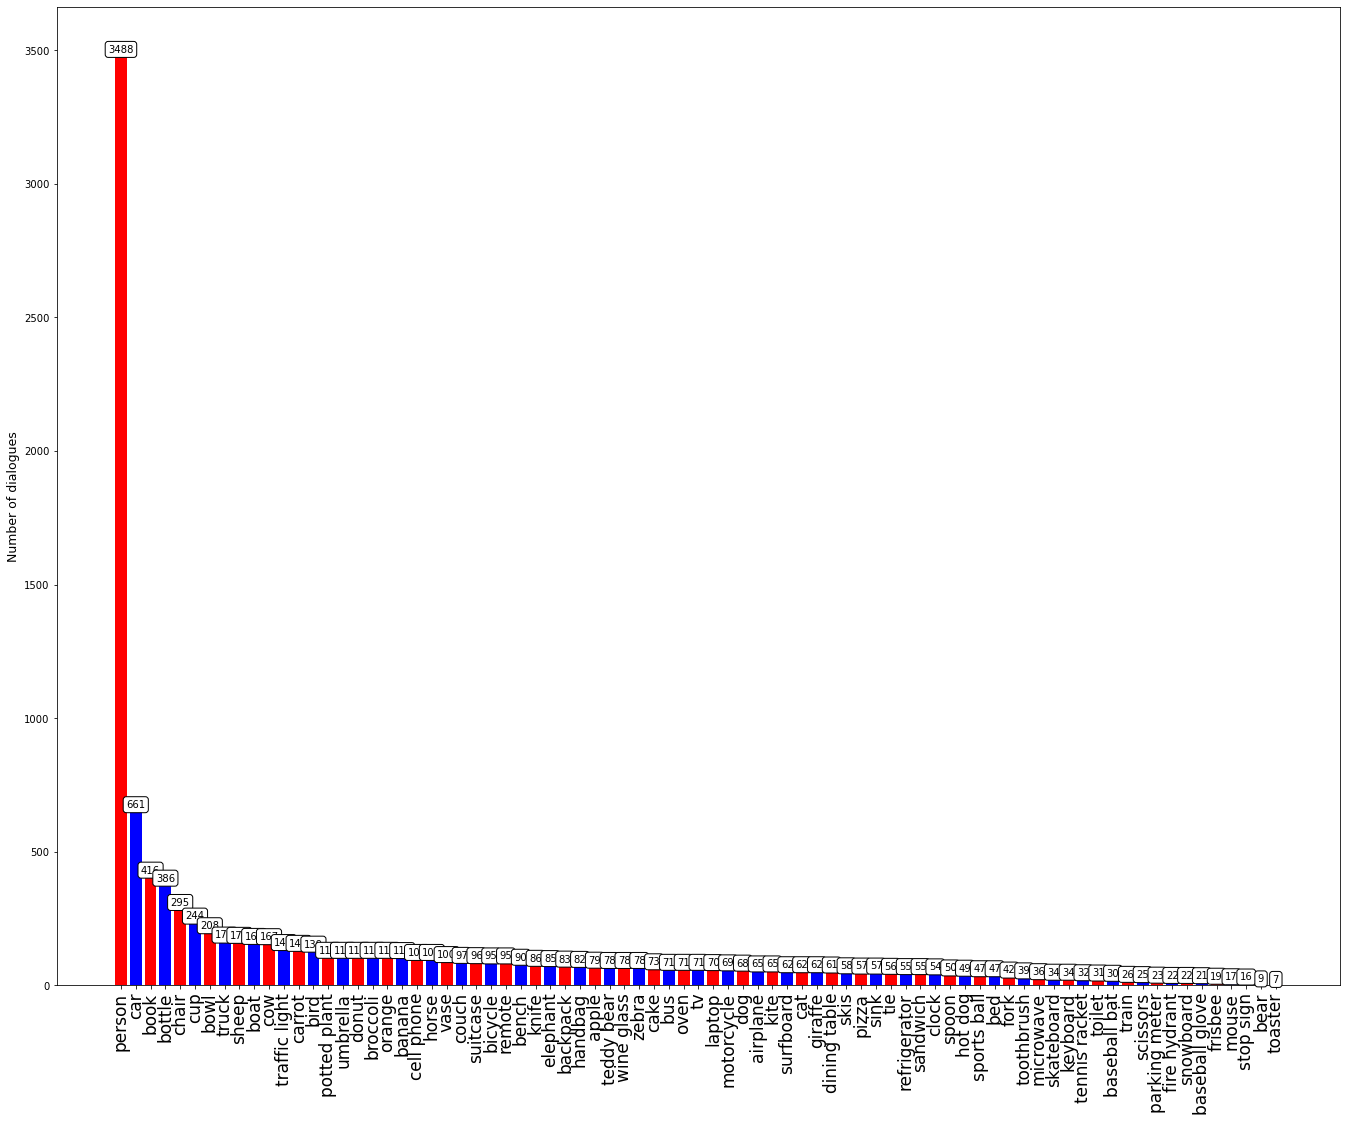

In [55]:
sorted_m={k: v for k, v in sorted(test_target.items(),reverse=True, key=lambda item: item[1])}

x= list(sorted_m.keys())
y = list(sorted_m.values())

fig, ax =  plt.subplots(figsize = (23, 18))
ax.bar(x, y,color=['r','blue'])
for bar in ax.patches:
    ax.annotate(text = bar.get_height(),
                  xy = (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', 
                  va='center',
                  size=10,
                  xytext=(0,4),bbox=dict(boxstyle="round", fc="w"),
               textcoords='offset points')
plt.xticks(fontsize=17)
plt.xticks(rotation=90)
plt.ylabel("Number of dialogues",fontsize=12.5)
plt.show() 

In [56]:
test_pair={}
for s in  val_unsuccessful:
    target=s['target']
    guess=s['guess']
    pair=str(str(guess)+"-"+str(target))
    if pair not in test_pair:
        test_pair[pair]=0
    test_pair[pair]+=1
test_pair_sorted={k: v for k, v in sorted(test_pair.items(),reverse=True, key=lambda item: item[1])}
len(test_pair_sorted)

1234

In [57]:
count=0
for k,v in test_pair_sorted.items():
    count=v+count
count

11049

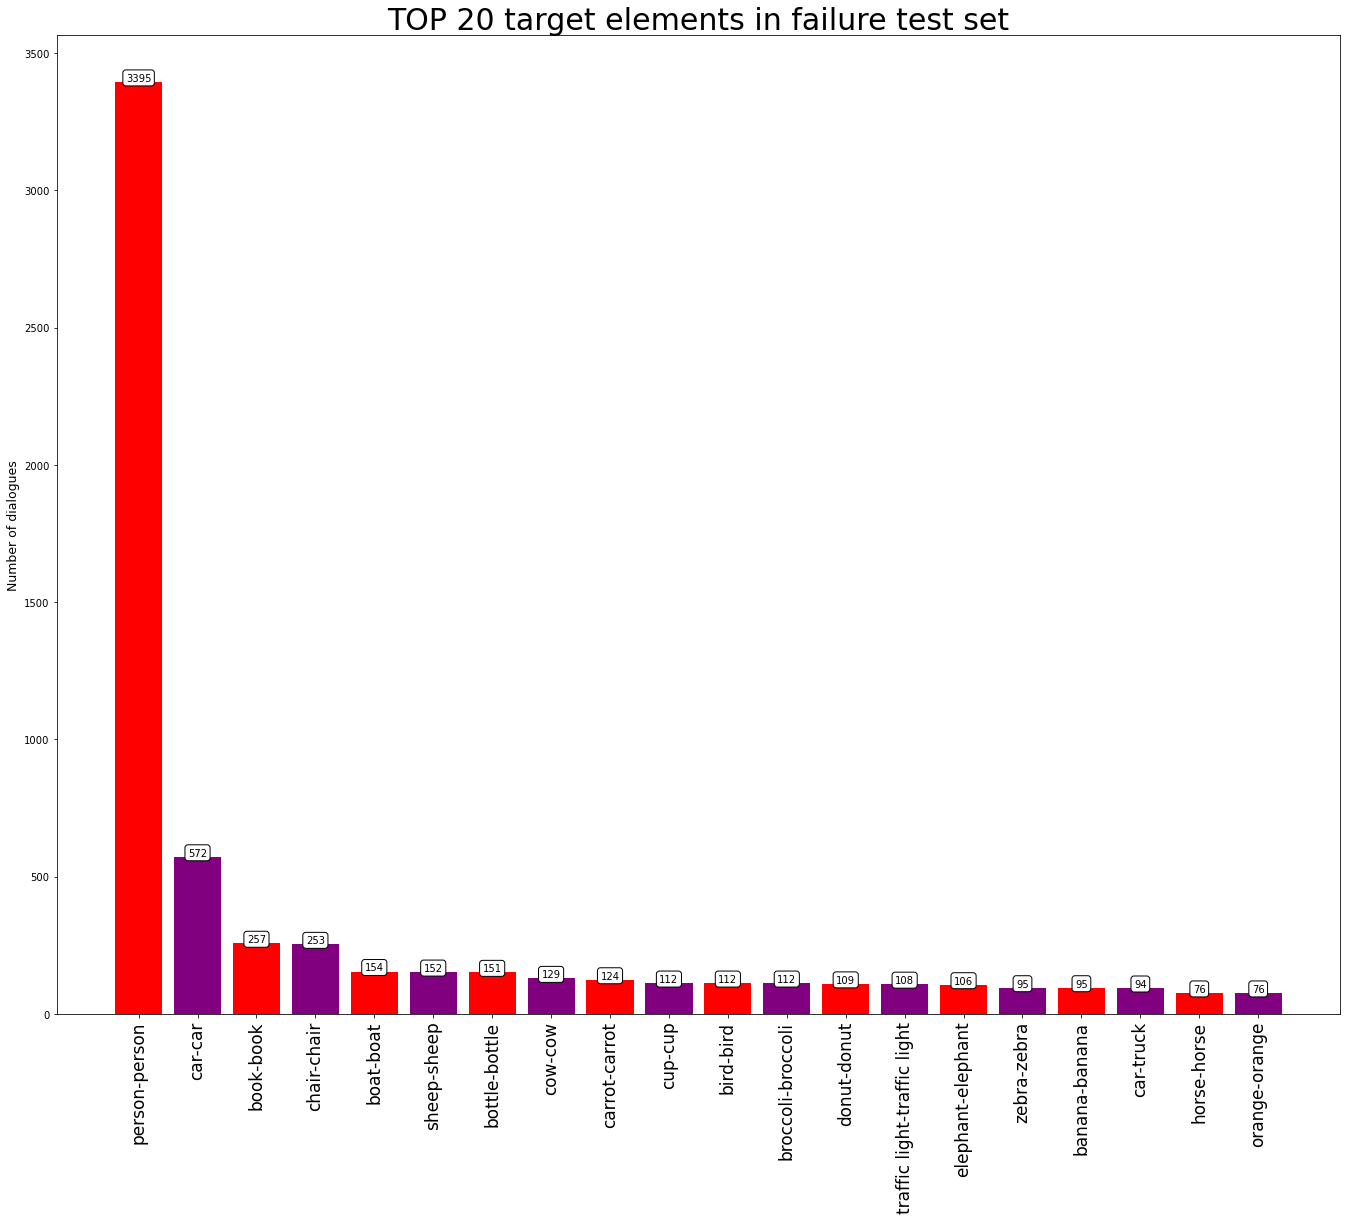

In [58]:
sorted_m={k: v for k, v in sorted(test_pair_sorted.items(),reverse=True, key=lambda item: item[1])}

x= list(sorted_m.keys())[:20]
y = list(sorted_m.values())[:20]

fig, ax =  plt.subplots(figsize = (23, 18))
ax.bar(x, y,color=['r','purple'])
for bar in ax.patches:
    ax.annotate(text = bar.get_height(),
                  xy = (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', 
                  va='center',
                  size=10,
                  xytext=(0,4),bbox=dict(boxstyle="round", fc="w"),
               textcoords='offset points')
plt.xticks(fontsize=17)
plt.xticks(rotation=90)
plt.ylabel("Number of dialogues",fontsize=12.5)
plt.title("TOP 20 target elements in failure test set",fontsize=30)
plt.show() 

In [59]:
test_pair_sorted

{'person-person': 3395,
 'car-car': 572,
 'book-book': 257,
 'chair-chair': 253,
 'boat-boat': 154,
 'sheep-sheep': 152,
 'bottle-bottle': 151,
 'cow-cow': 129,
 'carrot-carrot': 124,
 'cup-cup': 112,
 'bird-bird': 112,
 'broccoli-broccoli': 112,
 'donut-donut': 109,
 'traffic light-traffic light': 108,
 'elephant-elephant': 106,
 'zebra-zebra': 95,
 'banana-banana': 95,
 'car-truck': 94,
 'horse-horse': 76,
 'orange-orange': 76,
 'bowl-bowl': 74,
 'vase-vase': 74,
 'giraffe-giraffe': 70,
 'bench-bench': 68,
 'cake-cake': 68,
 'potted plant-potted plant': 66,
 'suitcase-suitcase': 64,
 'teddy bear-teddy bear': 61,
 'surfboard-surfboard': 60,
 'truck-truck': 59,
 'motorcycle-motorcycle': 59,
 'kite-kite': 58,
 'apple-apple': 57,
 'skis-skis': 54,
 'handbag-handbag': 53,
 'remote-remote': 52,
 'airplane-airplane': 51,
 'chair-couch': 48,
 'umbrella-umbrella': 45,
 'pizza-pizza': 42,
 'cup-bowl': 40,
 'bus-bus': 40,
 'backpack-backpack': 40,
 'skateboard-skateboard': 38,
 'bicycle-bicycle

In [60]:
'Even though only 78 target-guessed object pairs out of 1215 were identical,'
less_than_1000=0
less_than_100=0
less_than_50=0
less_than_10=0
less_than_5=0
count_identical=0
general_value_count=0
identical_value_count=0
for  s,v in test_pair_sorted.items():
    general_value_count=v+general_value_count
    s=(s.split("-"))
    if s[0]==s[1]:
        identical_value_count=v+identical_value_count
        count_identical+=1
    if 100<v<1000:
        less_than_1000+=1
    if 50<v<100:
        less_than_100+=1
    if 10<v<50:
        less_than_50+=1
    if 5<v<10:
        less_than_10+=1
    if 0<v<5:
        less_than_5+=1
rest_non_identical=general_value_count-identical_value_count
print(f"Number of identical target-guessed pairs in test dataset: { count_identical}")
print(f"How many failure cases are there in general: {general_value_count}")
print(f"How many failure cases are caused by identical target-guessed pairs: {identical_value_count}")
print(f"How many failure cases are caused by Non-identical target-guessed pairs: {rest_non_identical}")
print("------------------------")
print(f"{less_than_1000}")
print(f"{less_than_100}")
print(f"{less_than_50}")
print(f"{less_than_10}")
print(f"{less_than_5}")

Number of identical target-guessed pairs in test dataset: 78
How many failure cases are there in general: 11049
How many failure cases are caused by identical target-guessed pairs: 8106
How many failure cases are caused by Non-identical target-guessed pairs: 2943
------------------------
14
22
62
68
1021


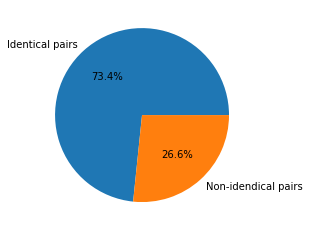

In [61]:
import matplotlib.pyplot as plt
labels=["Identical pairs","Non-idendical pairs"]
values = [identical_value_count, rest_non_identical]
plt.pie(values,labels=labels,autopct='%1.1f%%')
plt.show()

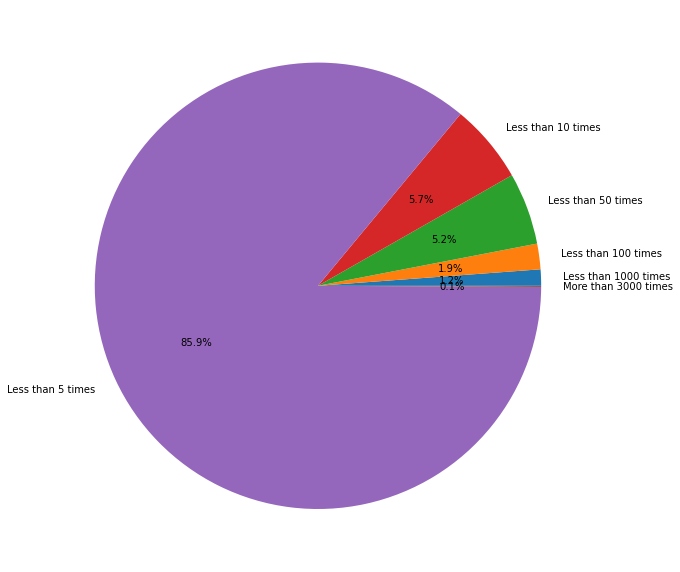

In [62]:
labels=["Less than 1000 times","Less than 100 times","Less than 50 times","Less than 10 times","Less than 5 times","More than 3000 times"]
values = [less_than_1000,less_than_100,less_than_50,less_than_10,less_than_5,1]
fig, ax =  plt.subplots(figsize = (10, 15))
plt.pie(values,labels=labels,autopct='%1.1f%%')
plt.show()

In [63]:
inanimate=['tie','toothbrush','car','scissors','book','truck', 'couch', 'handbag','baseball bat', 'cup', 'bottle', 'carrot', 'skateboard', 'apple', 'spoon', 'bicycle', 'remote', 'laptop', 'bus','traffic light', 'kite', 'hair drier', 'knife', 'banana', 'bowl', 'bed', 'boat', 'backpack', 'donut', 'vase', 'teddy bear', 'fork', 'tv', 'skis', 'microwave', 'sports ball', 'oven', 'orange', 'suitcase', 'umbrella',  'bench', 'broccoli', 'chair', 'snowboard', 'cake', 'baseball glove', 'potted plant', 'keyboard', 'sink', 'motorcycle', 'clock', 'dining table', 'cell phone', 'refrigerator', 'toilet', 'hot dog', 'airplane', 'parking meter', 'wine glass', 'surfboard', 'tennis racket', 'pizza', 'train', 'sandwich', 'stop sign', 'frisbee', 'fire hydrant', 'toaster']
animate=['bear','person', 'elephant','dog', 'bird', 'cow', 'zebra','cat','horse', 'sheep', 'giraffe', 'mouse']
print("How many inanimate ojects are there:",len(inanimate))
print("How many animate ojects are there:",len(animate))
count_inanimate=0
count_animate=0
count_animate_without_person=0
animate_dict={}
inanimate_dict={}
animate_without_person={}
for key,value in val_guess.items():
    if key in inanimate:
        inanimate_dict[key]=value
        count_inanimate+=value
    if key in animate:
        animate_dict[key]=value
        count_animate+=value
    if key in animate and key!='person':
        animate_without_person[key]=value
        count_animate_without_person+=value
print("How many inanimate objects were wrongly guessed out of 11049 faliure cases:",count_inanimate)
print("How many animate objects were wrongly guessed out of 11049 faliure cases:",count_animate)
print("How many animate,not considering 'Person',objects were wrongly guessed out of 11049 faliure cases:",count_animate_without_person)

How many inanimate ojects are there: 68
How many animate ojects are there: 12
How many inanimate objects were wrongly guessed out of 11049 faliure cases: 6665
How many animate objects were wrongly guessed out of 11049 faliure cases: 4380
How many animate,not considering 'Person',objects were wrongly guessed out of 11049 faliure cases: 936


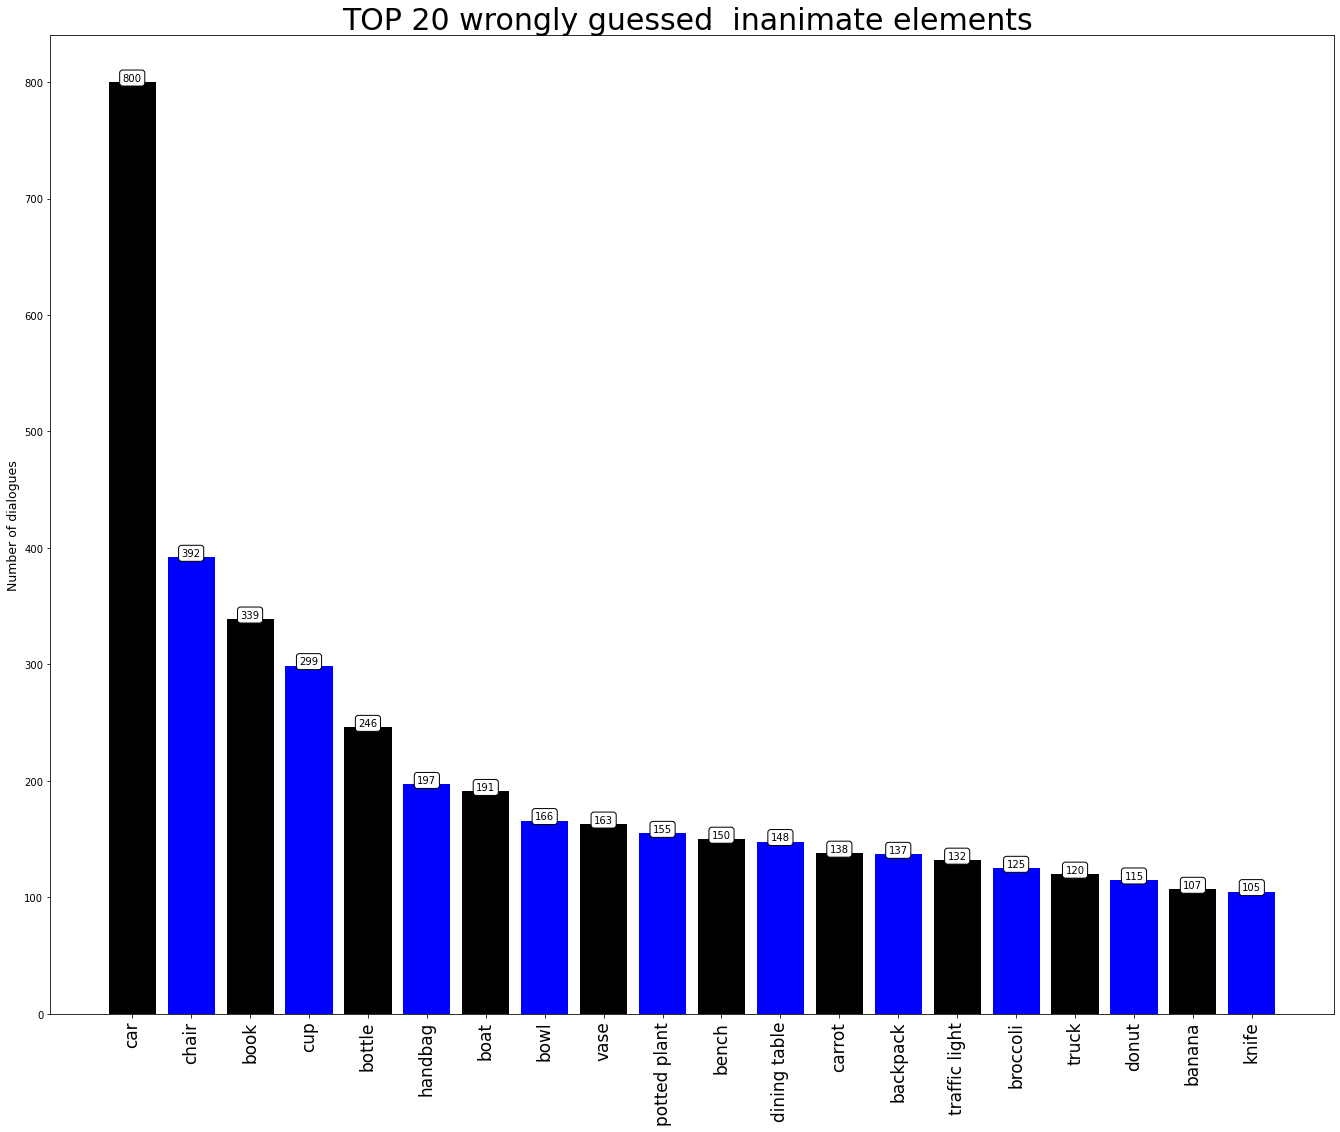

In [64]:
sorted_m={k: v for k, v in sorted(inanimate_dict.items(),reverse=True, key=lambda item: item[1])}

x= list(sorted_m.keys())[:20]
y = list(sorted_m.values())[:20]

fig, ax =  plt.subplots(figsize = (23, 18))
ax.bar(x, y,color=['black','blue'])
for bar in ax.patches:
    ax.annotate(text = bar.get_height(),
                  xy = (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', 
                  va='center',
                  size=10,
                  xytext=(0,4),bbox=dict(boxstyle="round", fc="w"),
               textcoords='offset points')
plt.xticks(fontsize=17)
plt.xticks(rotation=90)
plt.ylabel("Number of dialogues",fontsize=12.5)
plt.title("TOP 20 wrongly guessed  inanimate elements ",fontsize=30)
plt.show() 

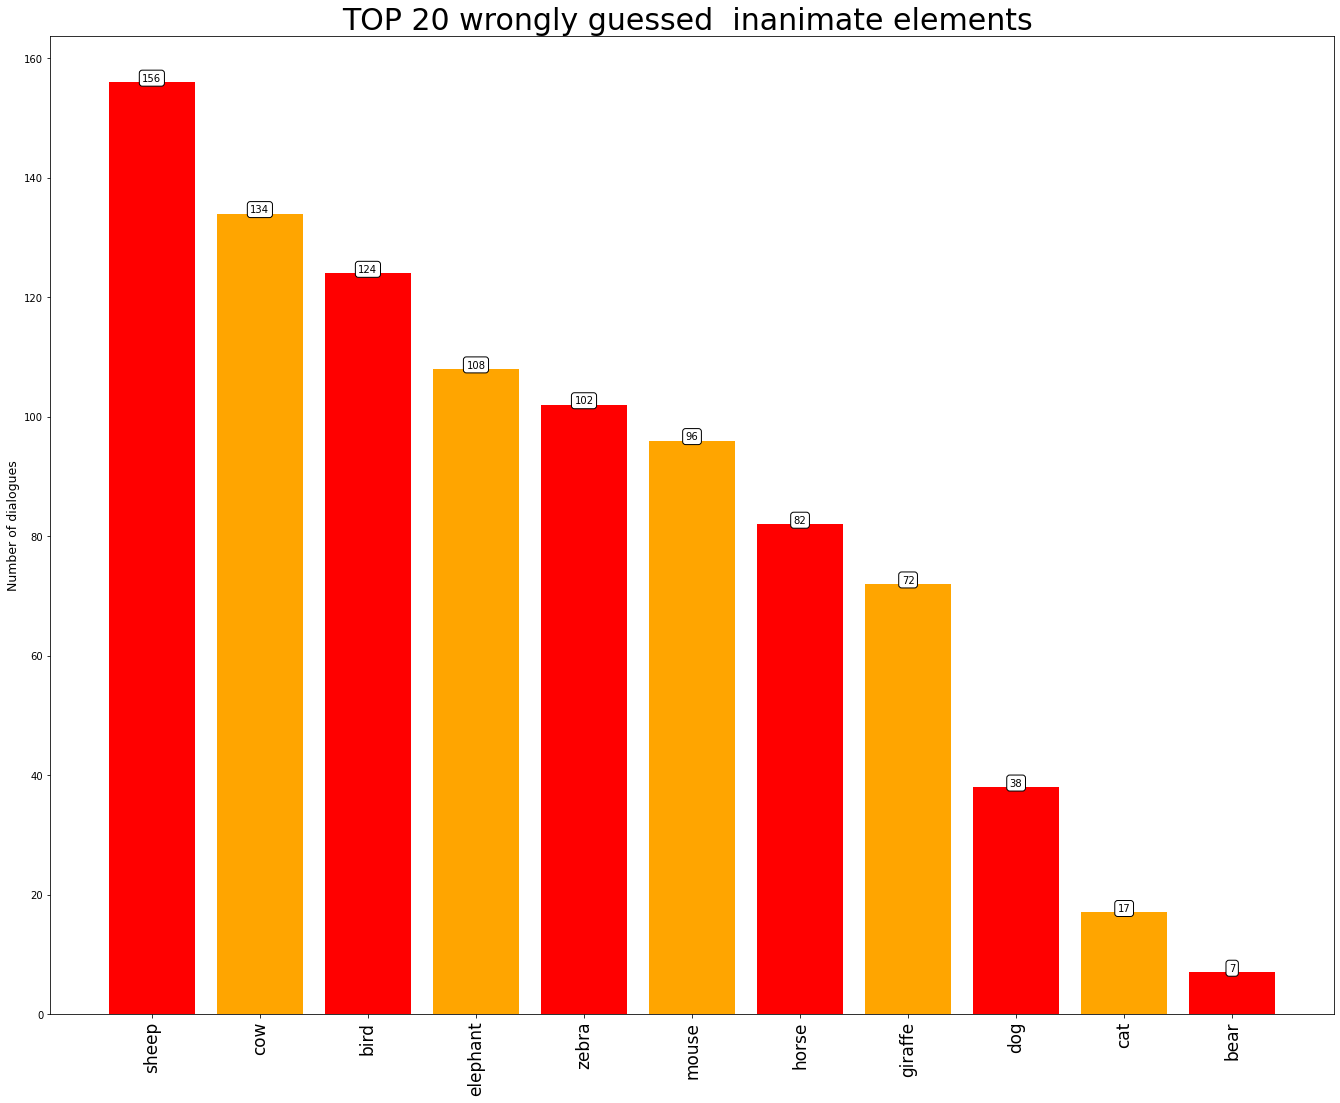

In [65]:
sorted_m={k: v for k, v in sorted(animate_without_person.items(),reverse=True, key=lambda item: item[1])}

x= list(sorted_m.keys())[:20]
y = list(sorted_m.values())[:20]

fig, ax =  plt.subplots(figsize = (23, 18))
ax.bar(x, y,color=['red','orange'])
for bar in ax.patches:
    ax.annotate(text = bar.get_height(),
                  xy = (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', 
                  va='center',
                  size=10,
                  xytext=(0,4),bbox=dict(boxstyle="round", fc="w"),
               textcoords='offset points')
plt.xticks(fontsize=17)
plt.xticks(rotation=90)
plt.ylabel("Number of dialogues",fontsize=12.5)
plt.title("TOP 20 wrongly guessed  inanimate elements ",fontsize=30)
plt.show() 

# A little bit of Linguistic analysis.

Generally, there are 11049 dialogues, and each one consists of 10 questions, then we have 110490 questions in total. The model qenerates only closed questions as the Oracle is able to answer "yes" or "no". Mainly the the questions start with "Is it" phrase and this type of questions make up 80\%  of the all the questions asked in the 11049 failed dialogues,to be exact,88515 questions 

In [66]:
wh_questions=["who","what","how","where","when","why","which","whom","whose"]
wh_questions_count=0
is_it=0
is_it_a=0
is_it_the=0
is_it_in=0
is_it_at=0
is_it_on=0
check_other_question={}
from nltk.tokenize import word_tokenize
for s in val_unsuccessful:
    dialogue=s['generated_dialogue']
    dialogue=dialogue.replace("<start>","")
    dialogue=dialogue.replace("<no>","")
    dialogue=dialogue.replace("<yes>","")
    dialogue=dialogue.split("?")
    for question in dialogue:
        tokenized=word_tokenize(question)
        if len(tokenized)>=1:
            if tokenized[0]=='is' and tokenized[1]=="it":
                is_it+=1
            if tokenized[0] in wh_questions:
                wh_questions_count+=1
            if tokenized[0]=='is' and tokenized[1]=="it" and tokenized[2]=='a':
                is_it_a+=1
            elif tokenized[0]=='is' and tokenized[1]=="it" and tokenized[2]=='the':
                is_it_the+=1
            elif tokenized[0]=='is' and tokenized[1]=="it" and tokenized[2]=='in':
                is_it_in+=1
            elif tokenized[0]=='is' and tokenized[1]=="it" and tokenized[2]=='at':
                is_it_at+=1
            elif tokenized[0]=='is' and tokenized[1]=="it" and tokenized[2]=='on':
                is_it_on+=1
            else:
                if len(tokenized)>=2:
                    bigram=str(tokenized[0])+str("-")+str(tokenized[1])
                    if bigram!='is-it':
                        if bigram not in check_other_question:
                            check_other_question[bigram]=0
                        check_other_question[bigram]+=1
print("How many questions start with WH-quetion words: ",wh_questions_count)
print("How many questions start with 'IS IT': ",is_it)
print("How many questions start with 'IS IT A': ",is_it_a)
print("How many questions start with 'IS IT THE': ",is_it_the)
print("How many questions start with 'IS IT IN': ",is_it_in)
print("How many questions start with 'IS IT AT': ",is_it_at)
print("How many questions start with 'IS IT ON': ",is_it_on)

How many questions start with WH-quetion words:  0
How many questions start with 'IS IT':  88515
How many questions start with 'IS IT A':  39414
How many questions start with 'IS IT THE':  31423
How many questions start with 'IS IT IN':  3081
How many questions start with 'IS IT AT':  2002
How many questions start with 'IS IT ON':  4631


In [67]:
sorted_check_other_question={k: v for k, v in sorted(check_other_question.items(),reverse=True, key=lambda item: item[1])}
len(sorted_check_other_question)

559

In [68]:
sorted_check_other_question

{'is-wooden': 4363,
 'is-the': 2713,
 'the-places': 1939,
 'is-this': 1381,
 'the-there': 1315,
 'gloves-baseball': 1182,
 'at-hanging': 1137,
 'an-wooden': 472,
 'an-it': 419,
 'sauce-inanimate': 381,
 'by-inanimate': 366,
 'the-person': 275,
 'fruits-the': 237,
 'on-the': 228,
 'in-the': 184,
 'an-this': 165,
 'an-the': 144,
 'the-walls': 142,
 'papers-the': 141,
 'by-baseball': 131,
 'front-a': 119,
 'papers-engine': 116,
 'clothed-the': 110,
 'the-fur': 106,
 'the-cake': 102,
 'is-many': 98,
 'the-picture': 96,
 'get-hanging': 93,
 'by-basin': 92,
 'is-held': 91,
 'the-broccoli': 81,
 'papers-wing': 80,
 'the-white': 77,
 'papers-barn': 71,
 'sauce-basin': 68,
 'papers-it': 66,
 'it-is': 65,
 'the-fourth': 61,
 'front-the': 60,
 'liquid-the': 57,
 'the-seat': 56,
 'the-shirt': 50,
 'the-curb': 50,
 'at-the': 49,
 'sport-is': 47,
 'get-caring': 47,
 'is-sport': 43,
 'is-fire': 40,
 'the-strip': 38,
 'the-item': 37,
 'the-human': 37,
 'there-hanging': 36,
 'the-left': 35,
 'the-playi

In [69]:
for s in val_unsuccessful:
    dialogue=s['generated_dialogue']
    dialogue=dialogue.replace("<start>","")
    dialogue=dialogue.replace("<no>","")
    dialogue=dialogue.replace("<yes>","")
    dialogue=dialogue.split("?")
    for question in dialogue:
        tokenized=word_tokenize(question)
        if len(tokenized)>=1:
            if tokenized[0]=="sauce" and tokenized[1]=="inanimate":
                print(s['generated_dialogue'])

<start> is it does shoes ? <yes> is it in the compartments ? <no> is it in the shirt ? <yes> is it in the shirt ? <yes> is it in the stroller soft ? <no> is it the there in the soft ? <yes> is it primary a ski ? <no> is it in the soft ? <yes> sauce inanimate eating barn second ? <yes> is it the there liquid the human hanging the shoes in compartments ? <no>
<start> is it a any ? <yes> is it in the compartments ? <no> is it in the shirt ? <no> is it on the left ? <no> is it in the shirt ? <no> is it in the compartments ? <no> is it the any primary the there on the human ? <yes> the places wheels ? <yes> is it the places wheels ? <yes> sauce inanimate eating the places heads ? <yes>
<start> is it does clock ? <yes> is it the clean ? <yes> the places clean ? <yes> at hanging it ? <yes> the places clean ? <yes> sauce inanimate eating the lady's second ? <yes> sauce inanimate eating the lady's second ? <yes> an the clean counter a for bow ? <yes> is it the clean on the left ? <yes> is it th

Generally, color is also a good source for identifying the object, however, this opportunity is not used correctly by the model. The token 'white' is repeated  8218 times, meanwhile, the tokens such as "grey" and "green" appear only once in the whole failure dataset.


In [70]:
colors=["blue","green","red","purple","orange","pink","grey","brown","yellow","black","white"]
colors_dict={}
from nltk.tokenize import word_tokenize
for s in val_unsuccessful:
    dialogue=s['generated_dialogue']
    dialogue=dialogue.replace("<start>","")
    dialogue=dialogue.replace("<no>","")
    dialogue=dialogue.replace("<yes>","")
    dialogue=dialogue.split("?")
    for question in dialogue:
        tokenized=word_tokenize(question)
        if len(tokenized)>=1:
            for word in tokenized:
                if word in colors:
                    if word not in colors_dict:
                        colors_dict[word]=0
                    colors_dict[word]+=1

In [71]:
colors_dict

{'white': 8218,
 'red': 1469,
 'blue': 1345,
 'black': 569,
 'orange': 16,
 'brown': 69,
 'purple': 22,
 'green': 1,
 'grey': 1}